<p align="center"><span style="color:#00cc00; text-decoration:underline; font-size:1.5em;"><i>FINAL PROYECT JOF</i></span></p>

<p align="center"><span style="color:#00cc00; text-decoration:underline; font-size:1.2em;"><i>Renewable Power Generation and weather Conditions</i></span></p>

![alt text](vecteezy_solar-panel-with-blue-sky-and-sunset-concept-clean-energy_8423306.jpg)

# Paso 1: definición del problema

**¡Hola a todos! Somos estudiantes del Bootcamp de Ciencia de Datos y Aprendizaje Automático: Javier Serrano, Olga Kurganova y Fernando Tejada. Para nuestro proyecto final, hemos decidido trabajar con un conjunto de datos que registra la energía recolectada por un panel solar en una ubicación geográfica específica. Además, el conjunto de datos incluye variables relacionadas con las condiciones climáticas, el tiempo cronológico y la variación en la cantidad de energía producida, todas las cuales pueden influir en la cantidad de radiación solar que el panel recoge, incluida la "Irradiancia Global Horizontal" (IGH):**

*Hello everyone! We are students of the Data Science & Machine Learning Bootcamp: Javier Serrano, Olga Kurganova, and Fernando Tejada. For our final project, we have decided to work with a dataset that records the energy collected by a solar panel in a specific geographical location. Additionally, the dataset includes variables related to weather conditions, chronological time and the variation in the amount of energy produced, all of which can influence in the amount of solar radiation the panel collects, including the "Global Horizontal Irradiance" (GHI):*

- Time                                      
- Energy delta [Wh]  **(target)**                        
- GHI (Global Horizontal Irradiance)        
- Temp                                     
- Pressure                                 
- Humidity
- Wind_speed                                  
- Rain_1h                                  
- Snow_1h                                 
- Clouds_all                                
- isSun_category                                     
- SunlightTime                             
- DayLength                                 
- SunlightTime/dayLength                    
- Weather_type                             
- Hour                                     
- Month    

**Gracias a este conjunto de datos, podremos crear un modelo de Aprendizaje Automático que nos permita determinar si la instalación de paneles solares es viable basándonos en la cantidad de energía que pueden recolectar (Energy delta [Wh]) y las condiciones climáticas en el sitio de instalación elegido. De esta manera, crearemos una herramienta que permita tanto a individuos locales como a empresas del sector energético verificar si es rentable invertir en la instalación de paneles solares.**

*Thanks to this dataset, we will be able to create a Machine Learning model that allows us to determine whether the installation of solar panels is viable based on the amount of energy they can collect and the weather conditions at the chosen installation site. In this way, we will create a tool that enables both local individuals and energy sector companies to verify whether it is profitable to invest in the installation of solar panels.*

# Paso 2: Obtención y carga del conjunto de datos

In [1]:
# import libraries

import pandas as pd
from sqlalchemy import create_engine
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv("/workspaces/Final-Project-JOF/data/raw/new_data.csv")
raw_data.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,isSun_category
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0,very cloudy,0,January,No
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0,very cloudy,0,January,No
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0,very cloudy,0,January,No
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0,very cloudy,0,January,No
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,450,0.0,very cloudy,1,January,No


 se ha cambiado a categórica: weather type, month y IsSun_category

# Paso 3: almacenar la información

In [3]:
engine = create_engine('sqlite:///solar_data.db')

In [4]:
raw_data.to_sql('solar_data', engine, index=False, if_exists='replace')

196776

In [5]:
# Consulta 1: Los 5 registros de energy delta más altos
query1 = """
SELECT * FROM solar_data
ORDER BY "Energy delta[Wh]" DESC
LIMIT 5
"""
top_5_energy_delta = pd.read_sql(query1, engine)
print("Top 5 registros de Energy delta más altos:")
top_5_energy_delta

Top 5 registros de Energy delta más altos:


,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,isSun_category
0,2021-04-28 10:30:00,5020,204.9,12.7,1011,39,5.9,0.0,0.0,68,435,900,0.48,cloudy,10,April,Yes
1,2018-03-17 10:45:00,4913,148.5,-3.0,1019,43,8.2,0.0,0.0,95,345,705,0.49,very cloudy,10,March,Yes
2,2020-03-22 11:00:00,4897,167.5,2.7,1038,39,5.0,0.0,0.0,58,375,735,0.51,cloudy,11,March,Yes
3,2019-05-07 10:15:00,4887,138.3,10.3,1017,50,4.7,0.0,0.0,65,435,930,0.47,cloudy,10,May,Yes
4,2017-04-30 10:45:00,4877,184.8,9.2,1024,57,4.7,0.0,0.0,76,450,900,0.50,cloudy,10,April,Yes


In [6]:
# Consulta 2: Los 5 registros de energy delta más bajos a las 12:00 (Time)
query2 = """
SELECT * FROM solar_data
WHERE strftime('%H', Time) = '12'
ORDER BY "Energy delta[Wh]" ASC
LIMIT 5
"""

lowest_5_energy_delta_noon = pd.read_sql(query2, engine)
print("Top 5 registros de Energy delta más bajos a las 12:00:")
lowest_5_energy_delta_noon

Top 5 registros de Energy delta más bajos a las 12:00:


,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,isSun_category
0,2017-05-01 12:00:00,0,128.2,14.2,1019,49,6.8,0.0,0.0,21,525,900,0.58,a little bit cloudy,12,May,Yes
1,2017-05-20 12:00:00,0,95.3,15.5,1019,75,5.5,0.0,0.0,100,570,975,0.58,very cloudy,12,May,Yes
2,2017-05-20 12:15:00,0,88.2,15.5,1019,75,5.5,0.0,0.0,100,585,975,0.60,very cloudy,12,May,Yes
3,2017-05-20 12:30:00,0,99.8,15.5,1019,75,5.5,0.0,0.0,100,600,975,0.62,very cloudy,12,May,Yes
4,2017-05-20 12:45:00,0,102.8,15.5,1019,75,5.5,0.0,0.0,100,615,975,0.63,very cloudy,12,May,Yes


In [7]:
# Consulta 3: Los 2 registros de energy delta más altos con GHI y nubes más altos
query3 = """
SELECT * FROM solar_data
ORDER BY "Energy delta[Wh]" DESC, GHI DESC, clouds_all DESC
LIMIT 2
"""

top_2_energy_delta_ghi_clouds = pd.read_sql(query3, engine)
print("Top 2 registros de Energy delta más altos con GHI y nubes más altos:")
top_2_energy_delta_ghi_clouds

Top 2 registros de Energy delta más altos con GHI y nubes más altos:


,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,isSun_category
0,2021-04-28 10:30:00,5020,204.9,12.7,1011,39,5.9,0.0,0.0,68,435,900,0.48,cloudy,10,April,Yes
1,2018-03-17 10:45:00,4913,148.5,-3.0,1019,43,8.2,0.0,0.0,95,345,705,0.49,very cloudy,10,March,Yes


In [8]:
# Definir las consultas SQL para calcular el sumatorio total de la energía captada (Energy delta[Wh]) dividido entre 365
queries = [
    """
    SELECT SUM("Energy delta[Wh]") / 365 AS energy_per_day_2017 FROM solar_data
    WHERE Time BETWEEN '2017-01-01' AND '2017-12-31'
    """,
    """
    SELECT SUM("Energy delta[Wh]") / 365 AS energy_per_day_2018 FROM solar_data
    WHERE Time BETWEEN '2018-01-01' AND '2018-12-31'
    """,
    """
    SELECT SUM("Energy delta[Wh]") / 365 AS energy_per_day_2019 FROM solar_data
    WHERE Time BETWEEN '2019-01-01' AND '2019-12-31'
    """,
    """
    SELECT SUM("Energy delta[Wh]") / 365 AS energy_per_day_2020 FROM solar_data
    WHERE Time BETWEEN '2020-01-01' AND '2020-12-31'
    """,
    """
    SELECT SUM("Energy delta[Wh]") / 365 AS energy_per_day_2021 FROM solar_data
    WHERE Time BETWEEN '2021-01-01' AND '2021-12-31'
    """
]

# Ejecutar las consultas y mostrar los resultados
for i, query in enumerate(queries, start=2017):
    result = pd.read_sql(query, engine)
    print(f"Sumatorio total de la energía captada (Energy delta[Wh]) dividido entre 365 para el año {i}:")
    print(result)

Sumatorio total de la energía captada (Energy delta[Wh]) dividido entre 365 para el año 2017:
   energy_per_day_2017
0                49947


Sumatorio total de la energía captada (Energy delta[Wh]) dividido entre 365 para el año 2018:
   energy_per_day_2018
0                58262
Sumatorio total de la energía captada (Energy delta[Wh]) dividido entre 365 para el año 2019:
   energy_per_day_2019
0                53339
Sumatorio total de la energía captada (Energy delta[Wh]) dividido entre 365 para el año 2020:
   energy_per_day_2020
0                53964
Sumatorio total de la energía captada (Energy delta[Wh]) dividido entre 365 para el año 2021:
   energy_per_day_2021
0                49792


In [9]:
raw_data.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,hour
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,211.721094,748.644347,0.265187,11.498902
std,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,273.902186,194.870208,0.329023,6.921887
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,0.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,570.000000,0.000000,5.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,30.000000,765.000000,0.050000,11.000000
75%,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,390.000000,930.000000,0.530000,17.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1020.000000,1020.000000,1.000000,23.000000


In [10]:
variables = ['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength']

# Calcula la moda para cada variable
for var in variables:
    moda = raw_data[var].mode()[0]
    print(f'La moda de {var} es: {moda}')

La moda de Energy delta[Wh] es: 0
La moda de GHI es: 0.0
La moda de temp es: 4.8
La moda de pressure es: 1018
La moda de humidity es: 94
La moda de wind_speed es: 2.2
La moda de rain_1h es: 0.0
La moda de snow_1h es: 0.0
La moda de clouds_all es: 100
La moda de sunlightTime es: 0
La moda de dayLength es: 1020
La moda de SunlightTime/daylength es: 0.0


### Análisis descriptivo de variables


- Energy delta[Wh]: con una moda de 0, se observa que está influenciada por los registros noctunos en los cuáles no hay presencia solar. El 75% de los datos se encuentran por debajo de los 577 Wh, áun existiendo un resgistro máximo de 5020 Wh, lo que indica la presencia de outliers.

- GHI (Global Horizontal Irradiance): con una moda igual a 0, se observa la misma situación que "Energy delta[Wh]" causado por los registros nocturnos. El 75% de los datos se encuentran por debajo de los 46.80, lo que indica que el dataset podría estar ubicado en una zona septentrional como podría ser Noruega, Rusia, Alaska o Japón.

- temp: con una media de 9.79 º C y una moda de 4.8 º C se podría confirmar que el dataset es relativo a una zona como las mencionadas en "GHI". No obstante, se observa un registro máximo de 35.80 ºC, lo que podría indicar presencia de outliers derivados del Calentamiento Global.

- pressure: tanto media (1015.29), como mediana (1016.00), como moda (1018) tienen unos valores cercanos, lo que sugiere una distribución fuertemente simétrica.

- humidity: la humedad en estos datos varía desde 22% hasta 100%, con una tendencia central hacia valores altos, como se evidencia por la mediana de 84% y la media de casi 80%.

- wind_speed: la velocidad del viento varía desde 0 m/s hasta 14.3 m/s, con una velocidad promedio de aproximadamente 3.94 m/s. La mediana y los percentiles indican que la mayoría de las observaciones están en el rango de 2.6 m/s a 5.0 m/s, sugiriendo que velocidades más altas son menos comunes.

- rain_1h: los valores en los percentiles 25, 50 y 75 son 0 mm/h. Esto sugiere que la precipitación es un evento relativamente raro en estos datos. Sin embargo, hay casos aislados donde se ha registrado hasta 8.09 mm de lluvia en una hora.

- snow_1h: los valores en los percentiles 25, 50 y 75 son todos 0 mm/h. Esto indica que la nieve es un evento muy raro en estos datos. No obstante, hay casos aislados donde se ha registrado hasta 2.82 mm de nieve en una hora.

- Clouds_all: en cuanto a la distribución la cobertura nubosa varía considerablemente, lo que sugiere que el clima en el área de estudio puede ser muy variable.
La mediana es considerablemente mayor que la media, indicando una distribución sesgada hacia valores más altos. Los outliers tienen valores extremos en 0% y 100% que son esperables en una variable de porcentaje de nubosidad.

- Sunlight_time: la distribución del tiempo de luz solar tiene un amplio rango, con una alta desviación estándar que indica una variabilidad considerable entre los días. La mediana es mucho menor que la media, lo que indica que hay muchos días con poco o nada de luz solar y algunos días con mucho.

- Day_length: la duración del día muestra una variación significativa que refleja los cambios estacionales. La mediana y la media son relativamente cercanas, lo que sugiere una distribución relativamente simétrica. El rango es bastante amplio, de 450 a 1020 minutos, indicando variaciones importantes a lo largo del año.

- SunlightTime/daylength: con una media de 0.27 y una mediana de solo 0.05, esta variable revela que en muchos días, la luz solar efectiva es una pequeña fracción del día total, reflejando una alta variabilidad y una distribución sesgada hacia valores bajos. Esta información es crucial para entender y optimizar la eficiencia de la generación de energía solar, destacando la necesidad de considerar factores climáticos y estacionales en la planificación energética.

In [11]:
# Realizar pruebas de normalidad
def normality_tests(raw_data, column):
    stat_shapiro, p_shapiro = stats.shapiro(raw_data[column].dropna())
    stat_ks, p_ks = stats.kstest(raw_data[column].dropna(), 'norm')
    
    print(f'Shapiro-Wilk test for {column}: Statistics={stat_shapiro}, p-value={p_shapiro}')
    print(f'Kolmogorov-Smirnov test for {column}: Statistics={stat_ks}, p-value={p_ks}')
    
    if p_shapiro < 0.05:
        print(f'Rechazamos H0 para {column} en Shapiro-Wilk test: La variable no sigue una distribución normal\n')
    else:
        print(f'No podemos rechazar H0 para {column} en Shapiro-Wilk test: La variable sigue una distribución normal\n')
    
    if p_ks < 0.05:
        print(f'Rechazamos H0 para {column} en Kolmogorov-Smirnov test: La variable no sigue una distribución normal\n')
    else:
        print(f'No podemos rechazar H0 para {column} en Kolmogorov-Smirnov test: La variable sigue una distribución normal\n')

# Aplicar pruebas de normalidad a todas las columnas numéricas
for column in raw_data.select_dtypes(include=[np.number]).columns:
    normality_tests(raw_data, column)

Shapiro-Wilk test for Energy delta[Wh]: Statistics=0.6159472853477984, p-value=2.9535462802344845e-169
Kolmogorov-Smirnov test for Energy delta[Wh]: Statistics=0.5, p-value=0.0
Rechazamos H0 para Energy delta[Wh] en Shapiro-Wilk test: La variable no sigue una distribución normal

Rechazamos H0 para Energy delta[Wh] en Kolmogorov-Smirnov test: La variable no sigue una distribución normal

Shapiro-Wilk test for GHI: Statistics=0.6851074104571122, p-value=1.4306659251793563e-162
Kolmogorov-Smirnov test for GHI: Statistics=0.5, p-value=0.0
Rechazamos H0 para GHI en Shapiro-Wilk test: La variable no sigue una distribución normal

Rechazamos H0 para GHI en Kolmogorov-Smirnov test: La variable no sigue una distribución normal

Shapiro-Wilk test for temp: Statistics=0.9906006415996702, p-value=7.657510668620788e-67
Kolmogorov-Smirnov test for temp: Statistics=0.7951321384259344, p-value=0.0
Rechazamos H0 para temp en Shapiro-Wilk test: La variable no sigue una distribución normal

Rechazamos H

/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 196776.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for wind_speed: Statistics=0.9665955534660532, p-value=1.6951600892149516e-96
Kolmogorov-Smirnov test for wind_speed: Statistics=0.887754678296783, p-value=0.0
Rechazamos H0 para wind_speed en Shapiro-Wilk test: La variable no sigue una distribución normal

Rechazamos H0 para wind_speed en Kolmogorov-Smirnov test: La variable no sigue una distribución normal

Shapiro-Wilk test for rain_1h: Statistics=0.2496821007257788, p-value=8.233881540943262e-193
Kolmogorov-Smirnov test for rain_1h: Statistics=0.5, p-value=0.0
Rechazamos H0 para rain_1h en Shapiro-Wilk test: La variable no sigue una distribución normal

Rechazamos H0 para rain_1h en Kolmogorov-Smirnov test: La variable no sigue una distribución normal

Shapiro-Wilk test for snow_1h: Statistics=0.07860147963443931, p-value=2.4037208015826977e-200
Kolmogorov-Smirnov test for snow_1h: Statistics=0.5, p-value=0.0
Rechazamos H0 para snow_1h en Shapiro-Wilk test: La variable no sigue una distribución normal

Rechazamos 

Para todas las variables examinadas, los resultados de ambas pruebas llevaron al rechazo de la hipótesis nula (H0) de que las variables siguen una distribución normal. Los detalles son los siguientes:

- **Energy delta[Wh]**

    Shapiro-Wilk: Estadística=0.616, p-valor=2.95e-169

    Kolmogorov-Smirnov: Estadística=0.5, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **GHI**

    Shapiro-Wilk: Estadística=0.685, p-valor=1.43e-162

    Kolmogorov-Smirnov: Estadística=0.5, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **temp**

    Shapiro-Wilk: Estadística=0.991, p-valor=7.66e-67

    Kolmogorov-Smirnov: Estadística=0.795, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **pressure**

    Shapiro-Wilk: Estadística=0.991, p-valor=3.47e-65

    Kolmogorov-Smirnov: Estadística=1.0, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **humidity**

    Shapiro-Wilk: Estadística=0.911, p-valor=3.04e-123

    Kolmogorov-Smirnov: Estadística=1.0, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **wind_speed**

    Shapiro-Wilk: Estadística=0.967, p-valor=1.70e-96

    Kolmogorov-Smirnov: Estadística=0.888, p-valor=0.0

    Conclusión: No sigue una distribución normal.*

- **rain_1h**

    Shapiro-Wilk: Estadística=0.250, p-valor=8.23e-193

    Kolmogorov-Smirnov: Estadística=0.5, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **snow_1h**

    Shapiro-Wilk: Estadística=0.079, p-valor=2.40e-200

    Kolmogorov-Smirnov: Estadística=0.5, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **clouds_all**

    Shapiro-Wilk: Estadística=0.819, p-valor=1.07e-144

    Kolmogorov-Smirnov: Estadística=0.907, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **sunlightTime**

    Shapiro-Wilk: Estadística=0.780, p-valor=6.58e-151

    Kolmogorov-Smirnov: Estadística=0.520, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **dayLength**

    Shapiro-Wilk: Estadística=0.914, p-valor=3.75e-122

    Kolmogorov-Smirnov: Estadística=1.0, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **SunlightTime/daylength**

    Shapiro-Wilk: Estadística=0.780, p-valor=7.06e-151

    Kolmogorov-Smirnov: Estadística=0.5, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*

- **hour**

    Shapiro-Wilk: Estadística=0.951, p-valor=1.48e-106

    Kolmogorov-Smirnov: Estadística=0.894, p-valor=0.0

    *Conclusión: No sigue una distribución normal.*





En todas las pruebas realizadas, se rechazó la hipótesis nula de normalidad para las variables analizadas.

# Paso 5: realiza un EDA completo

* ### Exploración y limpieza de datos

In [12]:
raw_data.shape

(196776, 17)

tamaño total del dataset: 17 filas y 196.776 columnas

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  sunlightTime            196776 non-null  int64  
 11  dayLength               196776 non-null  int64  
 12  SunlightTime/daylength  196776 non-null  float64
 13  weather_type            196776 non-null  object 
 14  hour                

El dataset contiene 4 variables categóricas ('Time', 'weather_type', 'month', 'isSun_category') y 13 numéricas ('Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'hour'). Ninguna de las variables contiene valores nulos.

In [14]:
# Verificar si hay duplicados en el DataFrame
duplicates = raw_data.duplicated().any()
# Imprimir el resultado
if duplicates:
    print("El DataFrame tiene duplicados.")
else:
    print("\033[94mEl DataFrame no tiene duplicados.\033[0m")

El DataFrame no tiene duplicados.


* El análisis necesita una medida temporal cronológicamente hablando porque el cambio climatológico fluctua a lo largo del año, por lo tanto se necesita una referencia temporal. ('Time', 'month', 'sunlightTime', 'dayLength', 'SunlightTime/daylength')

* El análisis necesita de todas las variables relacionadas con el clima porque todas en mayor o menor medida pueden afectar a la cantidad de energía que puede recoger una placa solar incidiendo de manera directa en la intensidad de los rayos solares.('weather_type', 'GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all''isSun_category')

* Por lo tanto la variable que menos valor aporta sería 'hour', ya que es un dato que viene implícito en la variable 'Time'. Se procederá a dividir la variable 'Time' en añi, mes, día, hora y minuto en el análisis univariante.

In [41]:
# se elimina 'hour'

total_data_1= raw_data[['Time', 'month', 'Energy delta[Wh]', 'weather_type', 'isSun_category', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength']].copy()
total_data_1.head()

,Time,month,Energy delta[Wh],weather_type,isSun_category,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength
0,2017-01-01 00:00:00,January,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
1,2017-01-01 00:15:00,January,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
2,2017-01-01 00:30:00,January,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
3,2017-01-01 00:45:00,January,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
4,2017-01-01 01:00:00,January,0,very cloudy,No,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,450,0.0


In [43]:
total_data_1.to_csv("/workspaces/Final-Project-JOF/data/processed/total_data_1.csv")

## Análisis univariante

### Variables Categóricas ('month', 'weather_type', 'IsSun_category')

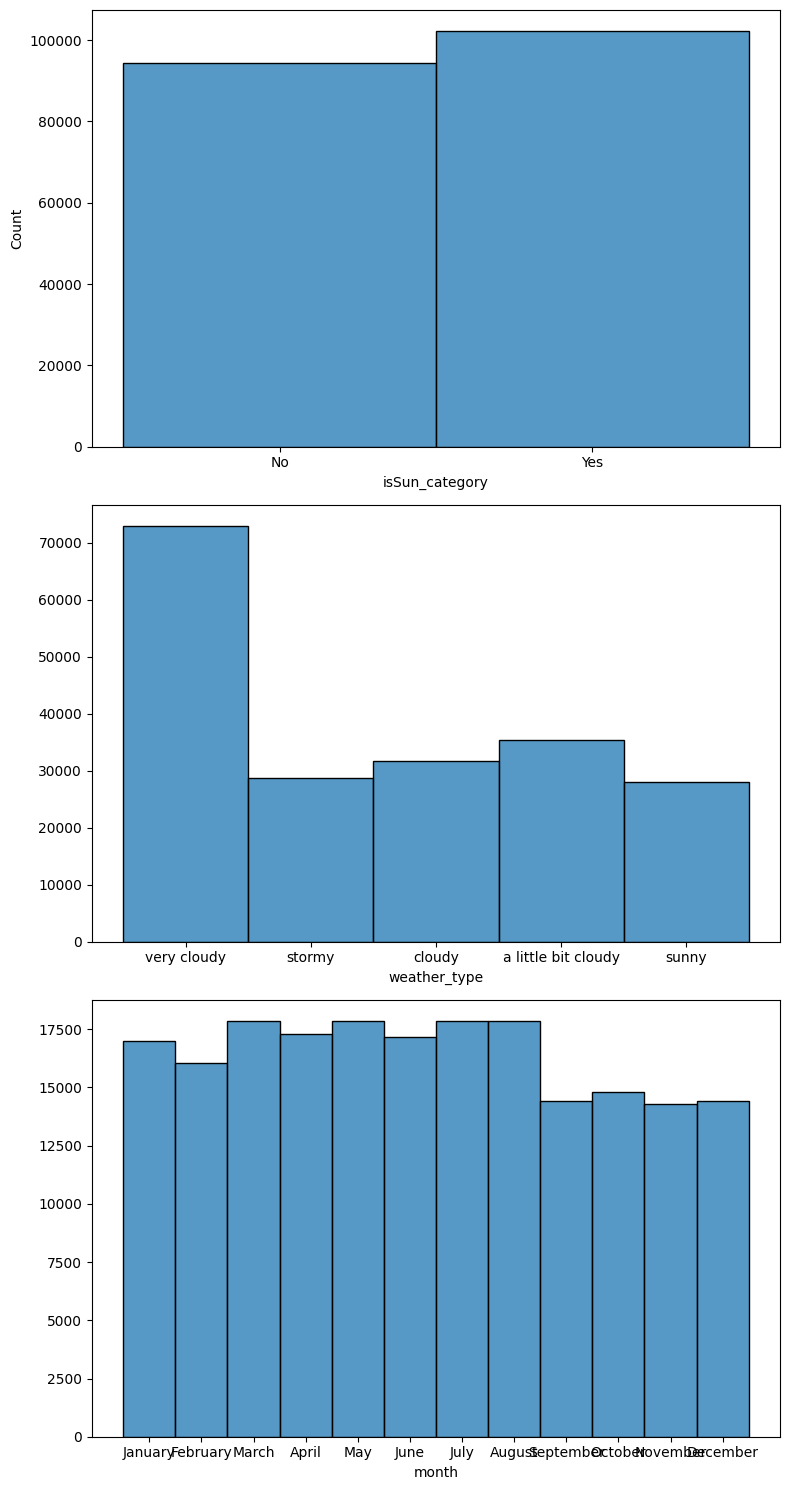

In [28]:
fig, axis = plt.subplots(3, 1, figsize = (8, 15))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data_1, x = "isSun_category")
sns.histplot(ax = axis[1], data = total_data_1, x = "weather_type").set(ylabel = None)
sns.histplot(ax = axis[2], data = total_data_1, x = "month").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

En el tipo de clima en el que se registraron los datos prevalecen ligeramente los días soleados, no obstante también hay una cantidad de días muy nublados ('very cloudy') bastante elevada y diferenciada con respecto a los demás valores de 'weather_type'. Como el registro de datos comienza en 2017-01-01 y termina el 2022-08-31, se observa que los 8 primeros meses contienen mayores registros.

### Variables Numéricas ('Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength')

previo al análisis de estas variables, hay que transformar la variable 'Time' para su análisis

In [51]:
#diferenciamos datasets para mantener variables categóricas necesarias para el análisis categórico-categórico

total_data_2 = total_data_1.copy()

In [45]:
total_data_2['Time'] = pd.to_datetime(total_data_2['Time'])

# Extraer Año, Mes y Hora
total_data_2['year'] = total_data_2['Time'].dt.year
total_data_2['month'] = total_data_2['Time'].dt.month
total_data_2['day'] = total_data_2['Time'].dt.day
total_data_2['hour'] = total_data_2['Time'].dt.hour
total_data_2['minute'] = total_data_2['Time'].dt.minute

total_data_2.head()

,Time,month,Energy delta[Wh],weather_type,isSun_category,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,year,day,hour,minute
0,2017-01-01 00:00:00,1,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0,2017,1,0,0
1,2017-01-01 00:15:00,1,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0,2017,1,0,15
2,2017-01-01 00:30:00,1,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0,2017,1,0,30
3,2017-01-01 00:45:00,1,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0,2017,1,0,45
4,2017-01-01 01:00:00,1,0,very cloudy,No,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,450,0.0,2017,1,1,0


In [47]:
total_data_2 = total_data_2[['year', 'month', 'day', 'hour', 'minute', 'Energy delta[Wh]', 'weather_type', 'isSun_category',
       'GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'snow_1h', 'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength']].copy()

total_data_2.head()

,year,month,day,hour,minute,Energy delta[Wh],weather_type,isSun_category,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength
0,2017,1,1,0,0,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
1,2017,1,1,0,15,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
2,2017,1,1,0,30,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
3,2017,1,1,0,45,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0
4,2017,1,1,1,0,0,very cloudy,No,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,450,0.0


In [48]:
total_data_2.to_csv("/workspaces/Final-Project-JOF/data/processed/total_data_time_division.csv")

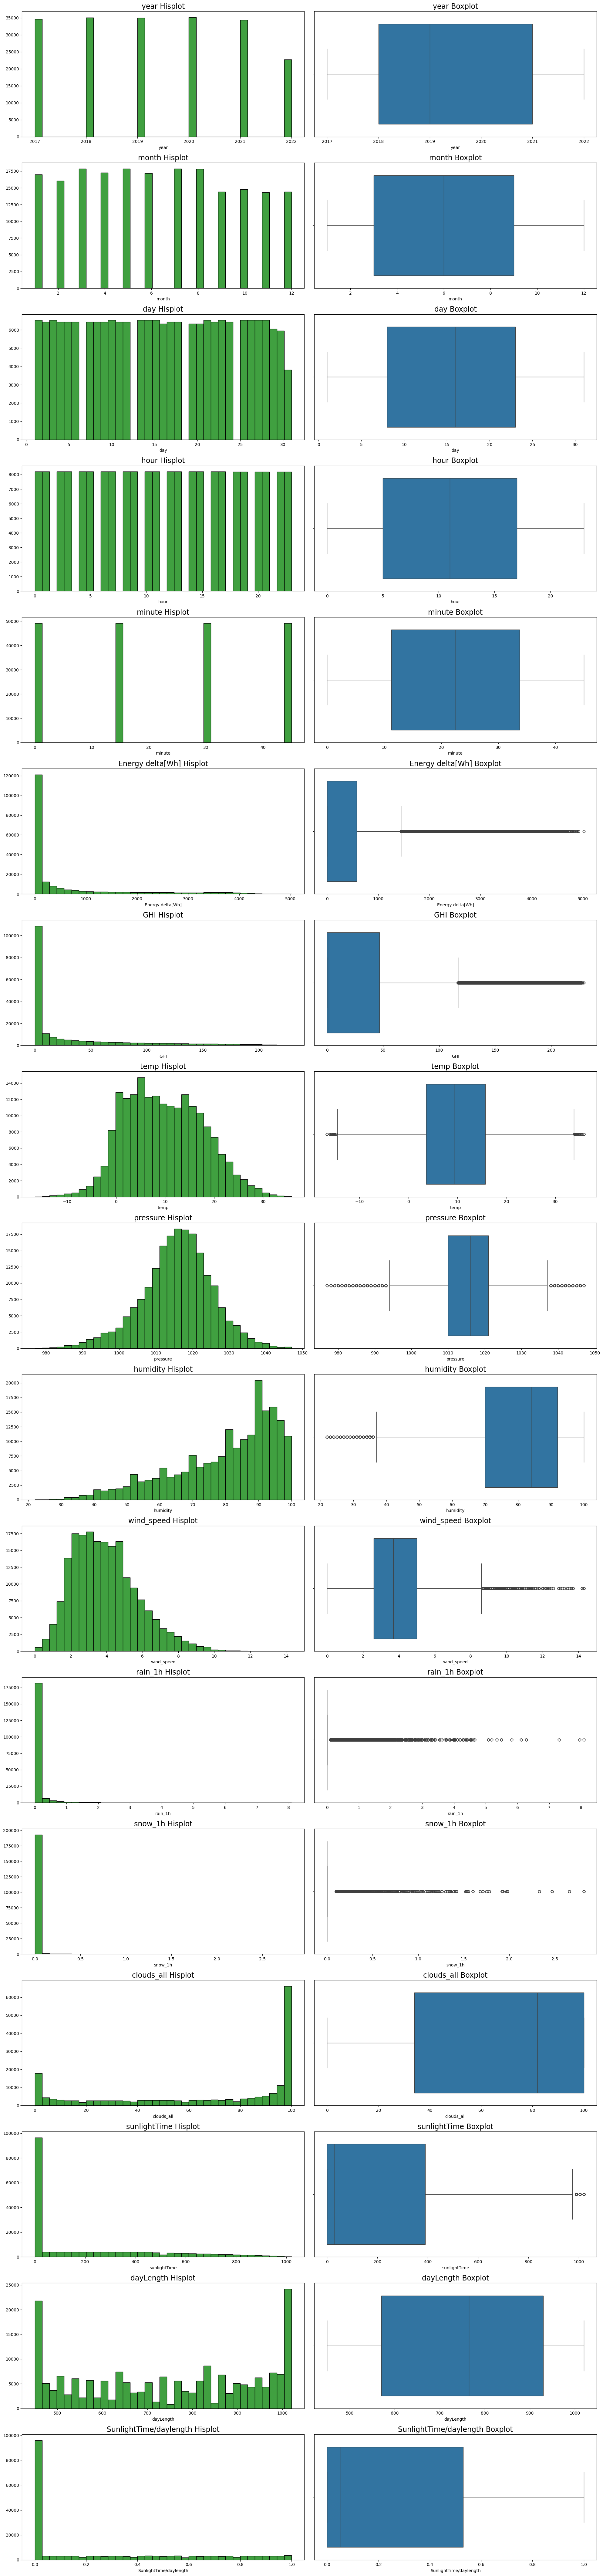

In [38]:
features = ['year', 'month', 'day', 'hour', 'minute', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
            'snow_1h', 'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength']

# Crear subplots
fig, axes = plt.subplots(len(features), 2, figsize=(20, 5*len(features)))

for i, feature in enumerate(features):

    # Histogram
    sns.histplot(ax=axes[i, 0], data=total_data_2, x=feature, bins=35, color='green').set(ylabel=None)
    axes[i, 0].set_title(f'{feature} Hisplot', fontdict={'fontsize': 17})
    
    #boxplot
    sns.boxplot(ax=axes[i, 1], data=total_data_2, x=feature)
    axes[i, 1].set_title(f'{feature} Boxplot', fontdict={'fontsize': 17})

plt.tight_layout()
plt.show()

- Year: menor registros de datos en 2022

- Month: número menor de registros en septiembre, octubre, noviembre y diciembre ya que los datos terminan en 2022-08-31.

- Day: se observan menos registros los días 29, 30 y 31 ya que no todos los meses contienen ese número de días.

- Hour/minute: resgitros simétricos y completos.

- Energy Delta (Wh): gran amplitud de registros, pero debido a los registros nocturnos cuando no hay sol, registro = 0 es el de mayor    
  incidencia.

- GHI: gran amplitud de registros, pero debido a los registros nocturnos cuando no hay sol, registro = 0 es el de mayor    
  incidencia.

- temp: la mayor cantidad de registros se observan entre los 1 ºC y 20 ºC, aunque se ven registros extremos tanto por encima como debajo 
  de ese rango.

- pressure: la mayor cantidad de registros se observan entre los 1010 hPa y 1020 hPa, aunque se ven registros tanto por encima 
  como debajo de ese rango.

- humidity: se observa un registro que tiende hacia la derecha, predominando registros con alta humedad y destacando el 90 %.

- wind_speed: se observa un mayor registro de valores entre los 2 km/h y los 5 km/h, habiendo resgitros extremos por encima de este 
  rango, aunque menos predominantes.

- rain_1h: la mayor cantidad de registros se sitúan en los 0 l/m2, es por eso que todo registro poco por encima se considera un valor 
  extremo, aunque en la realidad esos registros extremos observados en el diagrama de caja no sean tan inusuales.
  
- snow_1h: la mayor cantidad de registros se sitúan en los 0 l/m2, es por eso que todo registro poco por encima se considera un valor 
  extremo.

- clouds_all: predominan los registros con un 100 % de nubosidad, aunque en 2º lugar se observan una cantidad alta de nubosidad con % muy bajo en comparación con el resto de 
  registros.

- sunlightTime: debido a los registros de noche, predominan los 0 min de sol, pero a lo largo del día se acumulan los minutos de sol con una tendencia cada vez menor.

- dayLength: se observan mayor cantidad de registros en ambos extremos, destacando la mayor cantidad de días cortos y la mayor cantidad de días largos.

- SunlightTime/daylenth: el registro acaba estando en función de 'sunlightTime', debido a la variación de las horas de sol a lo largo del año.

## Análisis Multivariante

### Análisis Numérico-Numérico

### Análisis Categórico-Categórico

### Análisis Numérico-Categórico